# Exploratory Dana Analysis - EDA

In [120]:
# Instalación de las librerías y frameworks
#!pip install -r requirements.txt

In [121]:
# Import de las librerías requeridas para el EDA
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [122]:
pd.set_option('display.max_columns', None)

In [123]:
# Consulta de los datos limpios
df_datos = pd.read_csv("datos_limpios.csv", sep=";", encoding='ISO-8859-1')

In [124]:
# Consulta de datos para verificar la consulta
df_datos.head()

,ID_SNIES,Sexo,Estado Civil,Etnia,Discapacidad,Departamento Nacimiento,Programa,Facultad,Tipo Plan,Nombre Plan,PROMEDIO_1er_SEMESTRE,PROMEDIO_2do_SEMESTRE,Desertor,Semestre Ingreso,Edad Ingreso,Cantidad de materias vistas,Cantidad de cursos libres reprobados,Cantidad de cursos libres aprobados,Promedio de las materias,Cantidad de materias perdidas,Cantidad de creditos inscritos,Semestre Ubicación
0,11803-1110,Femenino,Soltero(a),No pertenece,Ninguna,Meta,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.73,3.67,No,1,17,62,0.0,6.0,3.898036,1.0,159.0,9.0
1,1055-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.67,3.91,No,1,17,64,0.0,6.0,3.960000,1.0,159.0,9.0
2,1118-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.50,3.53,No,1,15,65,0.0,6.0,3.764576,4.0,165.0,9.0
3,4703-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.44,3.62,No,1,19,69,2.0,6.0,3.584500,6.0,171.0,9.0
4,4990-1110,Femenino,Soltero(a),No informa,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,4.00,3.90,No,1,18,61,0.0,6.0,4.094545,0.0,156.0,9.0


## Analisis Univariable

In [125]:
# Función para la visualización por atributo

def graf_barra_atributo(df, atributo):
    ax = sns.countplot(data = df, y = atributo, order = df[atributo].value_counts().index, palette='colorblind')
    total = len(df[atributo])
    for p in ax.patches:
        # Calcular el porcentaje de cada barra
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        
        # Colocar el texto en la barra
        ax.annotate(percentage, (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                    ha='center', va='center')

    plt.title(f'Cantidad de observaciones por {atributo}')
    plt.show()

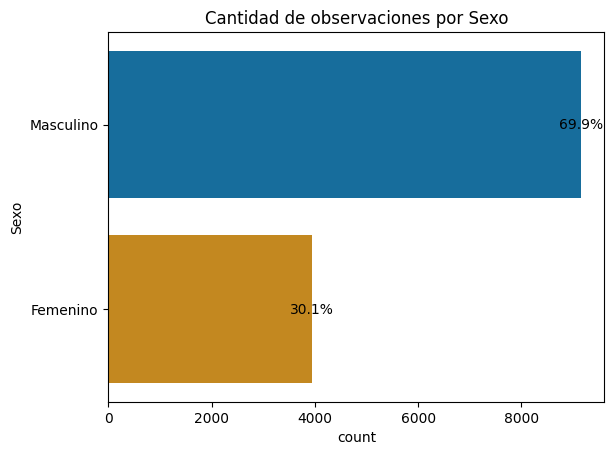

In [126]:
graf_barra_atributo(df_datos, 'Sexo')

Hay una mayor cantidad de registros cuyo sexo es masculino, por lo que debe validarse si es u comportamiento normal de los datos o hay un bias en la recolección.

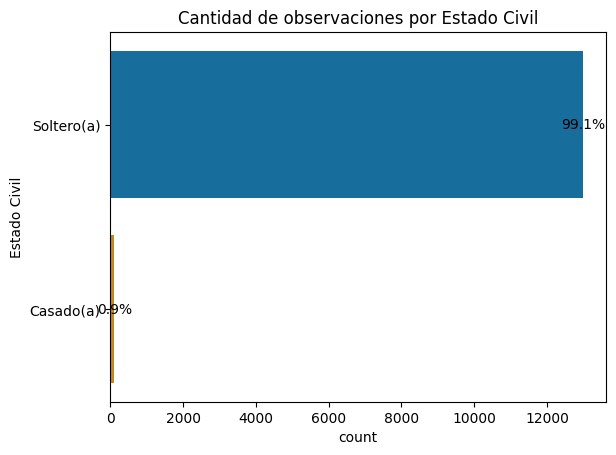

In [127]:
graf_barra_atributo(df_datos, 'Estado Civil')

El 99.1% de los registros son Solteros, de manera que puede que este sea un atributo a no ser utilizado. 

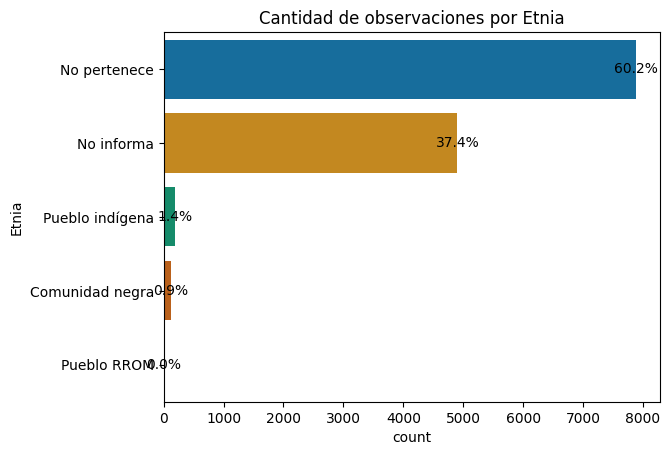

In [128]:
graf_barra_atributo(df_datos, 'Etnia')

Existe una distribución muy baja en las comunidades etnicas, de maner que se debe revisar si es un atributo a incluir en el modelado o no. 

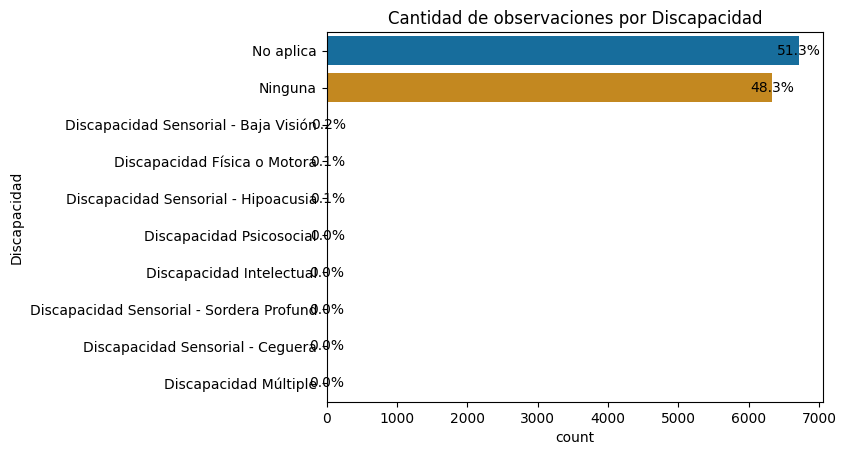

In [129]:
graf_barra_atributo(df_datos, 'Discapacidad')

Discapacidad es un atributo candidato a no hacer parte del modelado, dado que el 99.6% de los registros no tienen una discapacidad, esto debe validarse en el analisis multivariable.

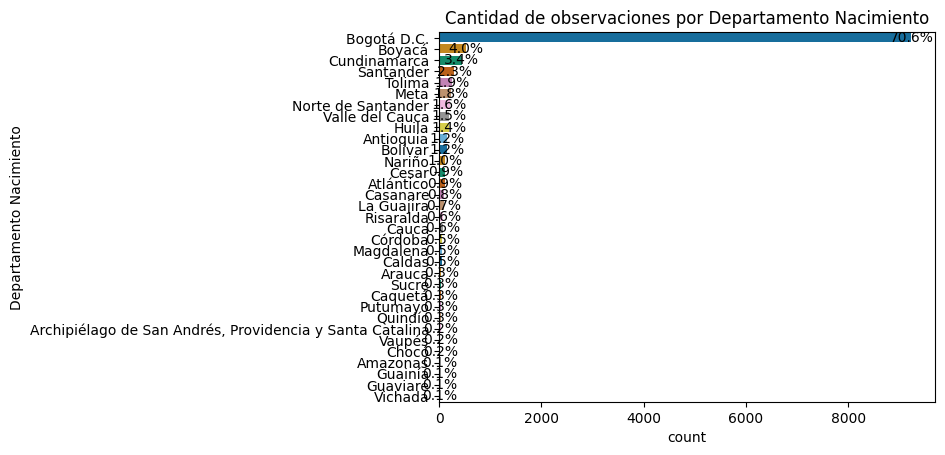

In [130]:
graf_barra_atributo(df_datos, 'Departamento Nacimiento')

La mayoria de los registros pertenecen a estudiantes cuyo departamento de nacimiento es Bogotá, y hay departamentos con una baja representación.

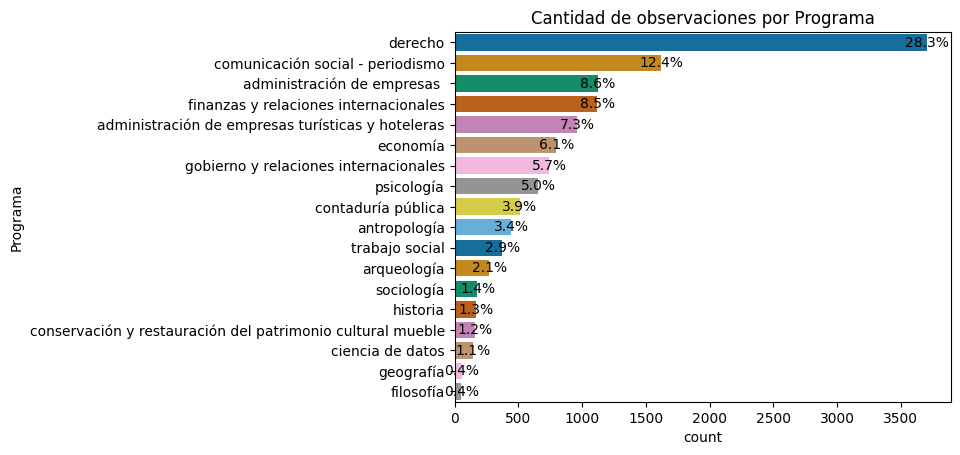

In [131]:
graf_barra_atributo(df_datos, 'Programa')

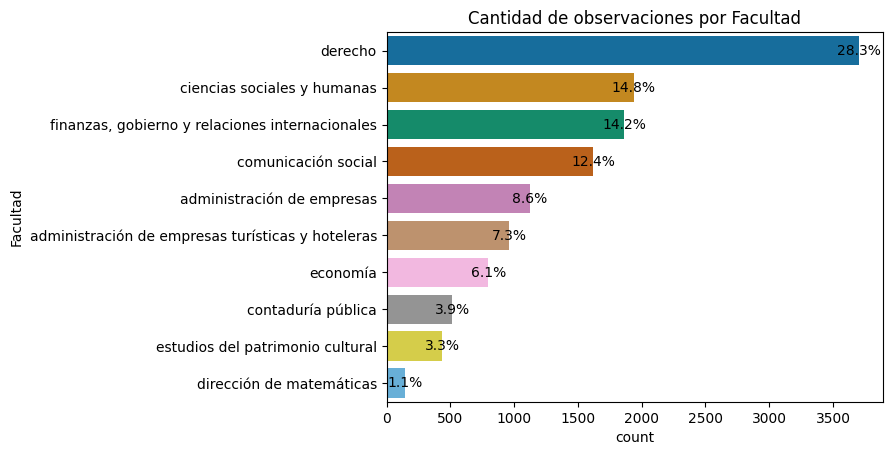

In [132]:
graf_barra_atributo(df_datos, 'Facultad')

La distribución por facultad y programa parecen estar relacionadas, dado la naturaleza del negocio, puede evaluarse si es requerida una de las dos.

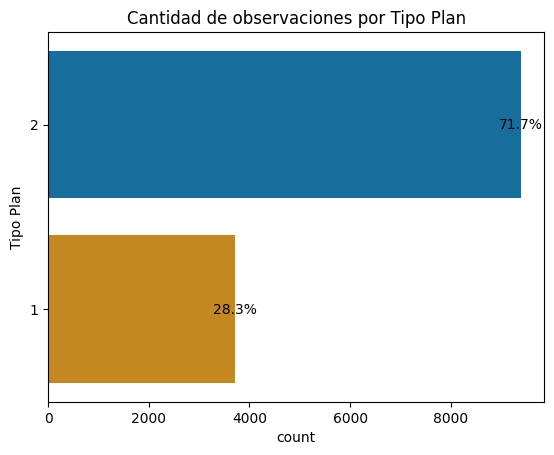

In [133]:
graf_barra_atributo(df_datos, 'Tipo Plan')

Se debe consultar a que se refiere con el atributo Tipo Plan, pero hay una mayor cantidad de registros que pertenecen a el tipo 2.

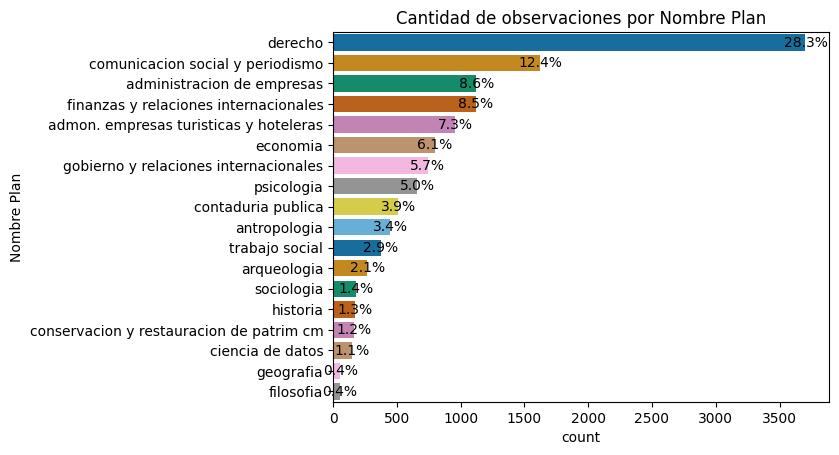

In [134]:
graf_barra_atributo(df_datos, 'Nombre Plan')

El atributo Nombre Plan y Programa parecen ser los mismos valores, por lo que se debe descartar uno de ellos.

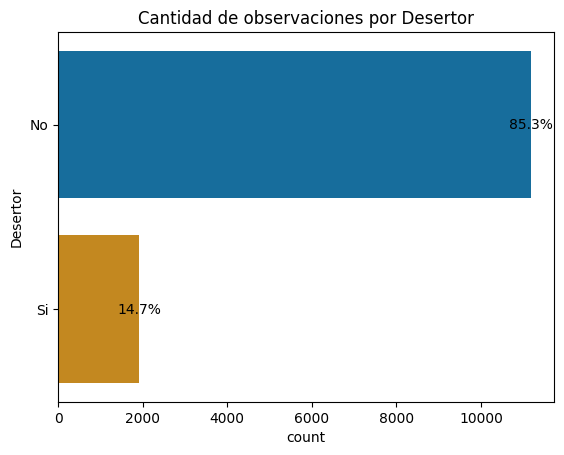

In [135]:
graf_barra_atributo(df_datos, 'Desertor')

El set de datos contiene un 14.7% de registros que son etiquetados como desertores.

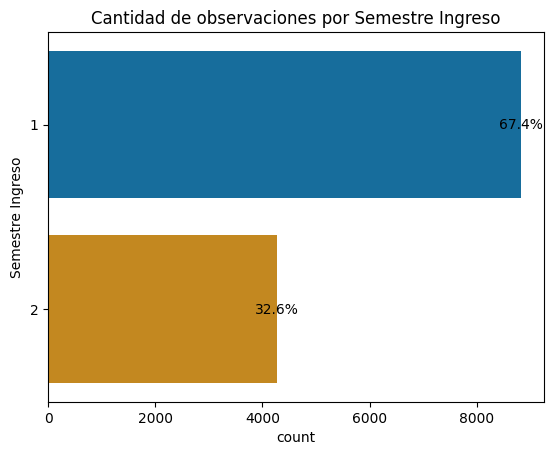

In [136]:
graf_barra_atributo(df_datos, 'Semestre Ingreso')

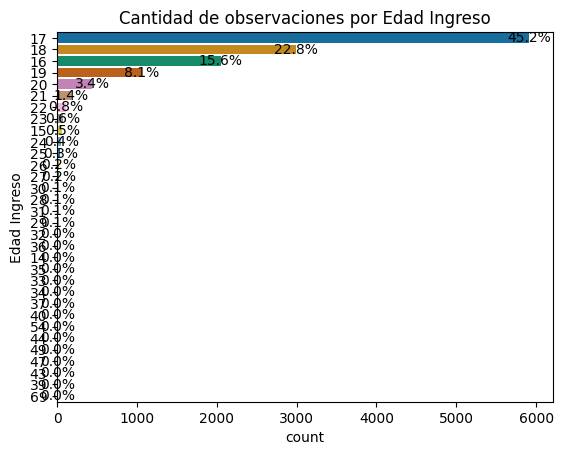

In [137]:
graf_barra_atributo(df_datos, 'Edad Ingreso')

La mayoria e los estudiantes ingresa cuando tiene edad entre 16 y 18 años.

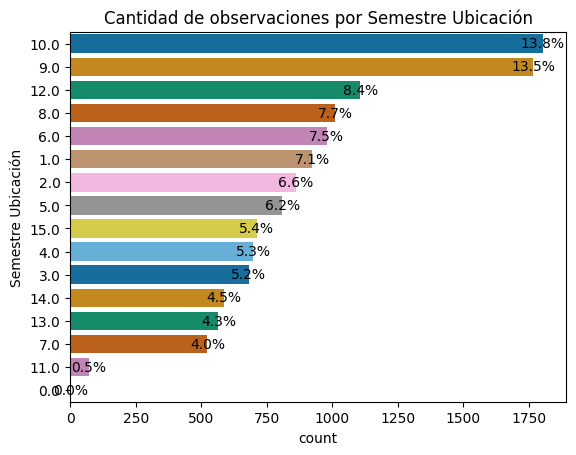

In [138]:
graf_barra_atributo(df_datos, 'Semestre Ubicación')

Al ser datos historicos se tiene una gran cantidad de registros de los últimos semestres, por lo que se espera una elevada cantidad en los semestres iguales al 10 o el primero (al tratarse de pregrado), pero llama la atención que hay un elevada cantidad en semestres intermedios, debe validarse si hay alguna relación con la deserción.

In [139]:
# Función para la graficación de histogramas
def graf_histograma(df, atributo):
    plt.figure(figsize=(9,8))
    ax = sns.displot(df[atributo], color = 'b', alpha=0.4)
    ax.fig.suptitle(f"Histograma de {atributo}", y=1.05, fontsize=16)
    plt.show()

<Figure size 900x800 with 0 Axes>

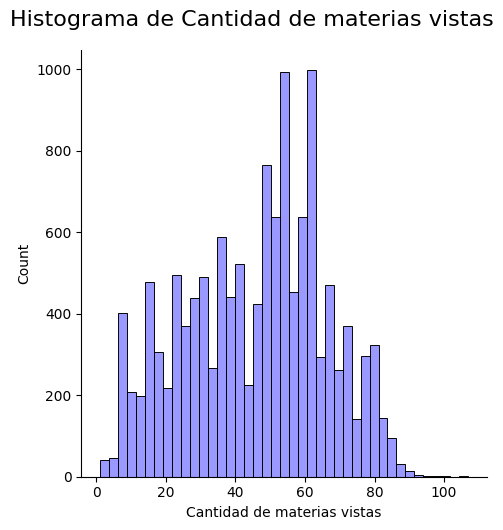

In [140]:
graf_histograma(df_datos, "Cantidad de materias vistas")

Se observa una distribución con un sesgo hacia la derecha, es decir que tiene una cola izquierda. Lo que indica que los estudiantes tienden ha ver entre 50 y 60 materias, esto hace logica dado que tenemos datos historicos con estudiantes ya graduados.

<Figure size 900x800 with 0 Axes>

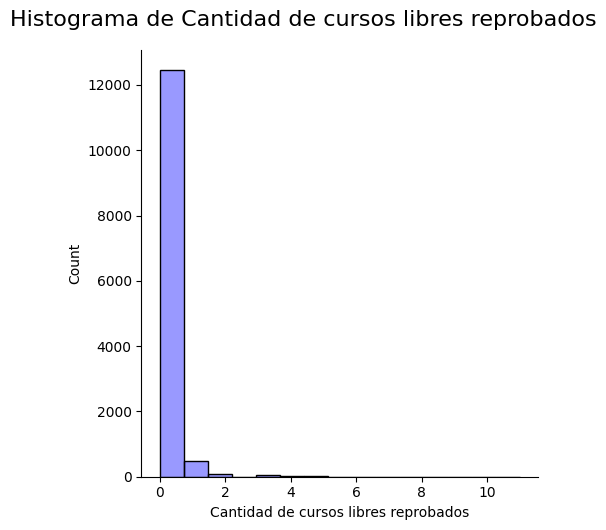

In [141]:
graf_histograma(df_datos, "Cantidad de cursos libres reprobados")

Esta grafica muestra que se tienden a perder pocos o ningun curos libre, el perder varios podría significar la deserción.

<Figure size 900x800 with 0 Axes>

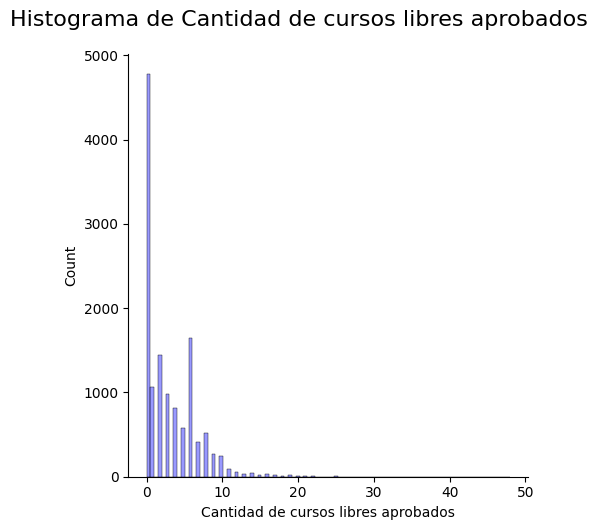

In [142]:
graf_histograma(df_datos, "Cantidad de cursos libres aprobados")

Se muestra una distribución con una larga cola derecha, lo que muestra como muchos de los estudiantes aprueban pocos cursos libres pero existen algunas anomalias en las que estudiantes cursan muchos de estos, debería revisarse los datos o consultar con alguien del negocio para establecer si estos comportamientos son outliers y deben ser incluido o no en el modelado.

<Figure size 900x800 with 0 Axes>

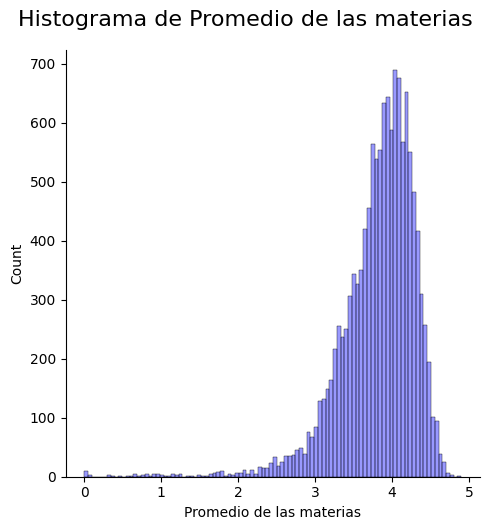

In [143]:
graf_histograma(df_datos, "Promedio de las materias")

El histograma con el promedio de las notas de las materias muestra como la distribución cuenta con una media cercana a 4, mientras que existen pocos registros con menos de 3. Esto nos lleva a pensar que son más los estudiantes que se grduan o por lo menos lo pueden hacer segun las notas obtenidas, que los que no logran graduarse. Además se observa una variacón baja, dada la densidad del gráfico.

<Figure size 900x800 with 0 Axes>

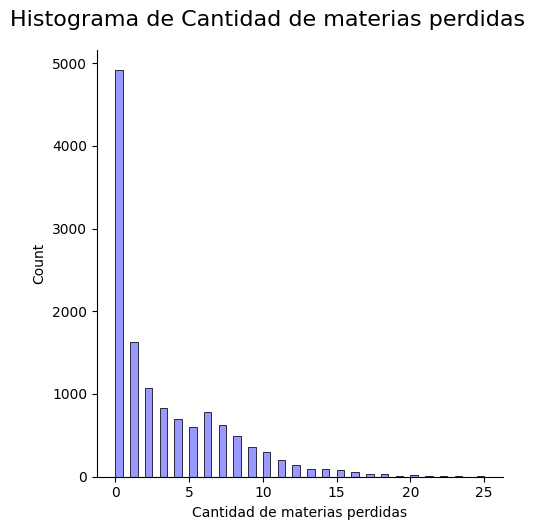

In [144]:
graf_histograma(df_datos, "Cantidad de materias perdidas")

Del gráfico se pùede establecer que una gran cantidad de estudiantes no pierden materias, este podría ser un atributo que ayude a establecer si un estudiante deja o no el programa educativo.

<Figure size 900x800 with 0 Axes>

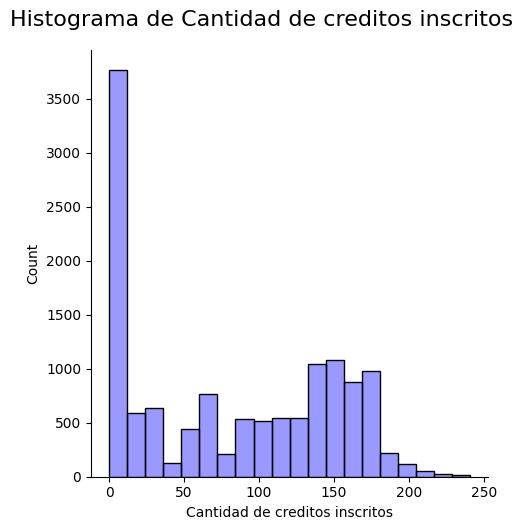

In [145]:
graf_histograma(df_datos, "Cantidad de creditos inscritos")

Hay una gran cantidad de registros que tiene pocos creditos inscritos, este puede ser un indicador de los lejos que llega el estudiante, debería estar relacionado con el semestre actual.

In [146]:
df_datos.describe()

,Tipo Plan,PROMEDIO_1er_SEMESTRE,PROMEDIO_2do_SEMESTRE,Semestre Ingreso,Edad Ingreso,Cantidad de materias vistas,Cantidad de cursos libres reprobados,Cantidad de cursos libres aprobados,Promedio de las materias,Cantidad de materias perdidas,Cantidad de creditos inscritos,Semestre Ubicación
count,13092.000000,13092.000000,13092.000000,13092.000000,13092.000000,13092.000000,13092.000000,13092.000000,13092.000000,13092.000000,13092.000000,13092.000000
mean,1.716850,3.860555,3.705876,1.326306,17.632600,45.784296,0.073327,3.053086,3.812684,3.207073,81.487168,7.891231
std,0.450546,0.457910,0.895763,0.468879,1.974337,20.108397,0.397802,3.559163,0.505778,3.954864,67.859002,4.037494
min,1.000000,0.000000,0.000000,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.620000,3.560000,1.000000,17.000000,30.000000,0.000000,0.000000,3.576538,0.000000,0.000000,5.000000
50%,2.000000,3.900000,3.880000,1.000000,17.000000,49.000000,0.000000,2.000000,3.901082,2.000000,85.000000,9.000000
75%,2.000000,4.150000,4.170000,2.000000,18.000000,61.000000,0.000000,6.000000,4.154194,6.000000,145.000000,10.000000
max,2.000000,4.940000,4.890000,2.000000,69.000000,107.000000,11.000000,48.000000,4.900000,25.000000,241.000000,15.000000


In [147]:
# Función par ala graficación de Box Plot
def graf_box_plot(df, atributo):
    sns.boxplot(data = df[atributo])
    plt.title(f'Box plot para {atributo}');

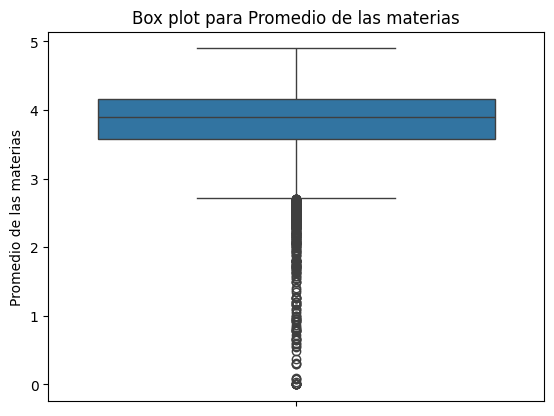

In [148]:
graf_box_plot(df_datos, "Promedio de las materias")

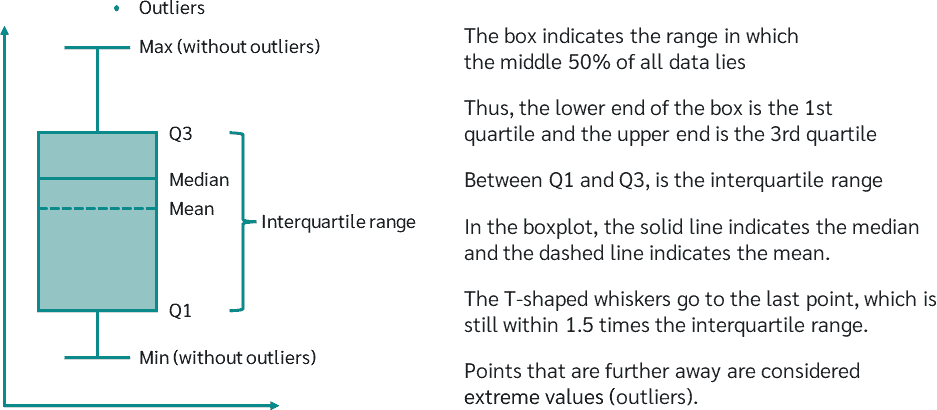

Se clasifican segun la g5rafica del boxplot los valores menores a 2,8 como valores extremos, sin embargo, segun el negocio stos son perfectamente entendibles y no deben ser eliminados. Menos del 25% de los estudiantes tienen promedio bajos, es decir menores a 3.

## Analisis multivariable

In [149]:
# Función para visualización multivariable

def graf_barra_atributo_multivariable(df, atributo, atributo_comparar):

    crosstab = pd.crosstab(df[atributo], df[atributo_comparar], normalize='index') * 100
    

    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')

    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.1f%%', label_type='center')

    plt.title(f'Porcentaje de observaciones por {atributo} vs {atributo_comparar}')
    plt.ylabel('Porcentaje')
    plt.xlabel(atributo)
    
    plt.show()

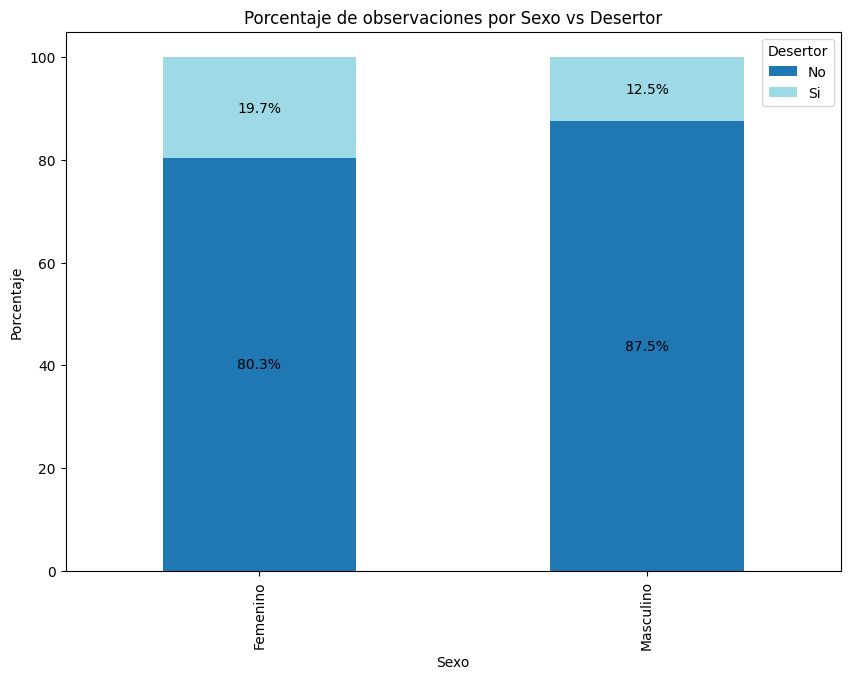

In [150]:
graf_barra_atributo_multivariable(df_datos, 'Sexo', 'Desertor')

El gráfico nos indica que existe una mayor cantidad de estudiantes de sexo Femenino que desiertan, en especial si lo compraramos con el 12.5% de hombres que lo hace. 
Puede ser que el sexo sea un atributo relevanta para determinar la probabilidad de que un estudiante desierte. 

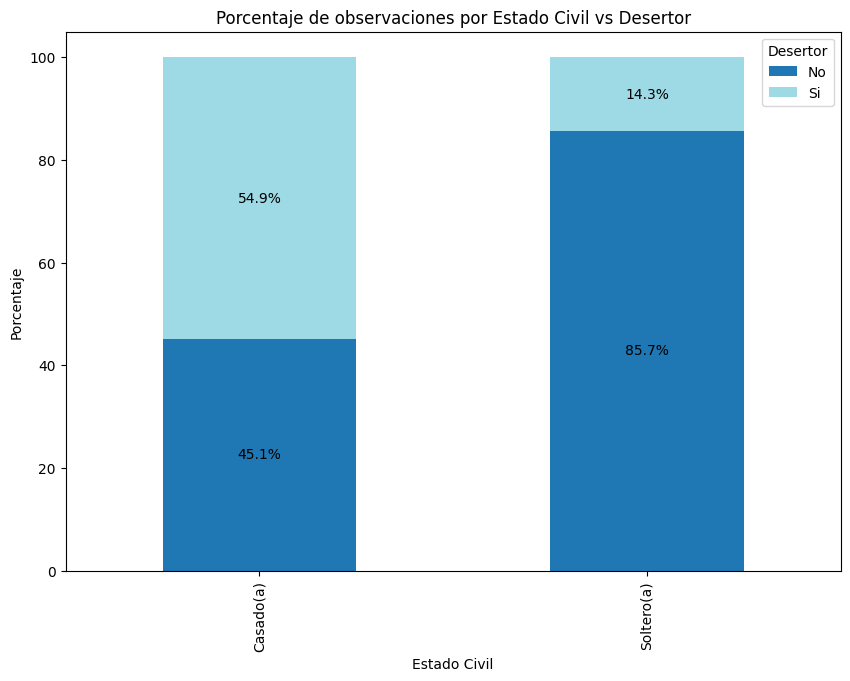

In [151]:
graf_barra_atributo_multivariable(df_datos, 'Estado Civil', 'Desertor')

Al parecer existe una alta probabilidad de que las personas casadas desierten, sin embargo, hay que tener en cuenta que la población casada es muy poca y esto puede llevar a comportamientos muy extremos. 

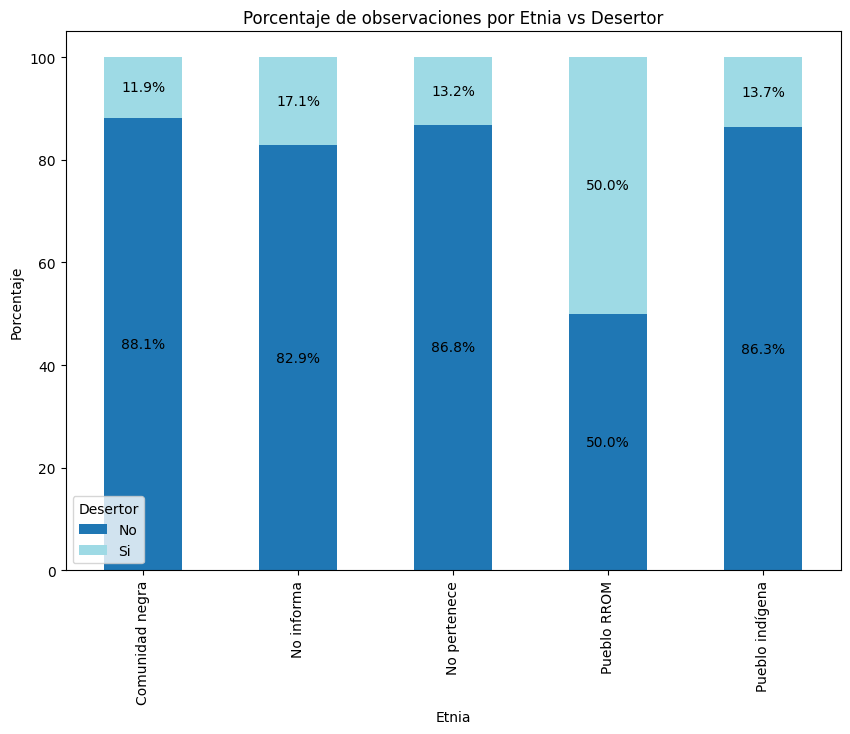

In [152]:
graf_barra_atributo_multivariable(df_datos, 'Etnia', 'Desertor')

Se visualizan diferencias entre los porcentajes de personas que desiertan según la etnia a la que pertencen, pudiendo existir una mayor deserción cuando se pertenece a pueblos RROM (Gitanos), sin embargo, la cantidad de registros es muy baja y podrían darse resultados que no son estadísticamente correctos.

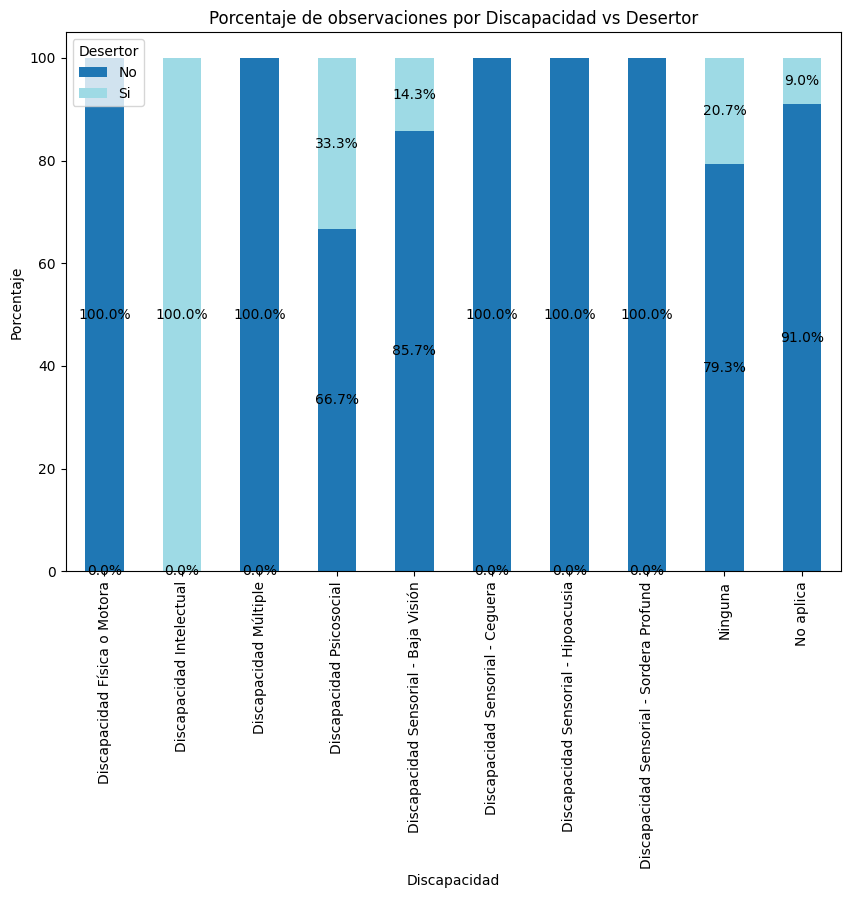

In [153]:
graf_barra_atributo_multivariable(df_datos, 'Discapacidad', 'Desertor')

Se observa que el 100% de los estudiantes que cuentan con discapcidad intelectual desertarón, sin embargo, la población es de un solo registro y los demás valores también cuentan con pocos individuos.

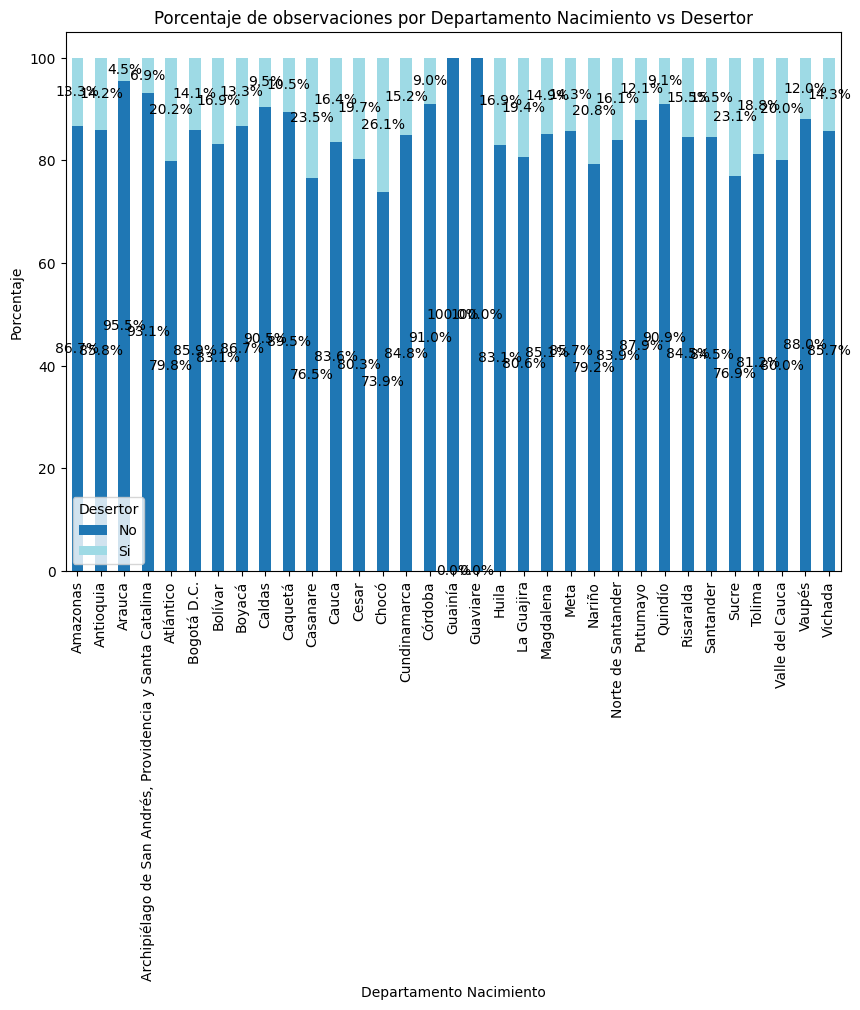

In [156]:
graf_barra_atributo_multivariable(df_datos, 'Departamento Nacimiento', 'Desertor')

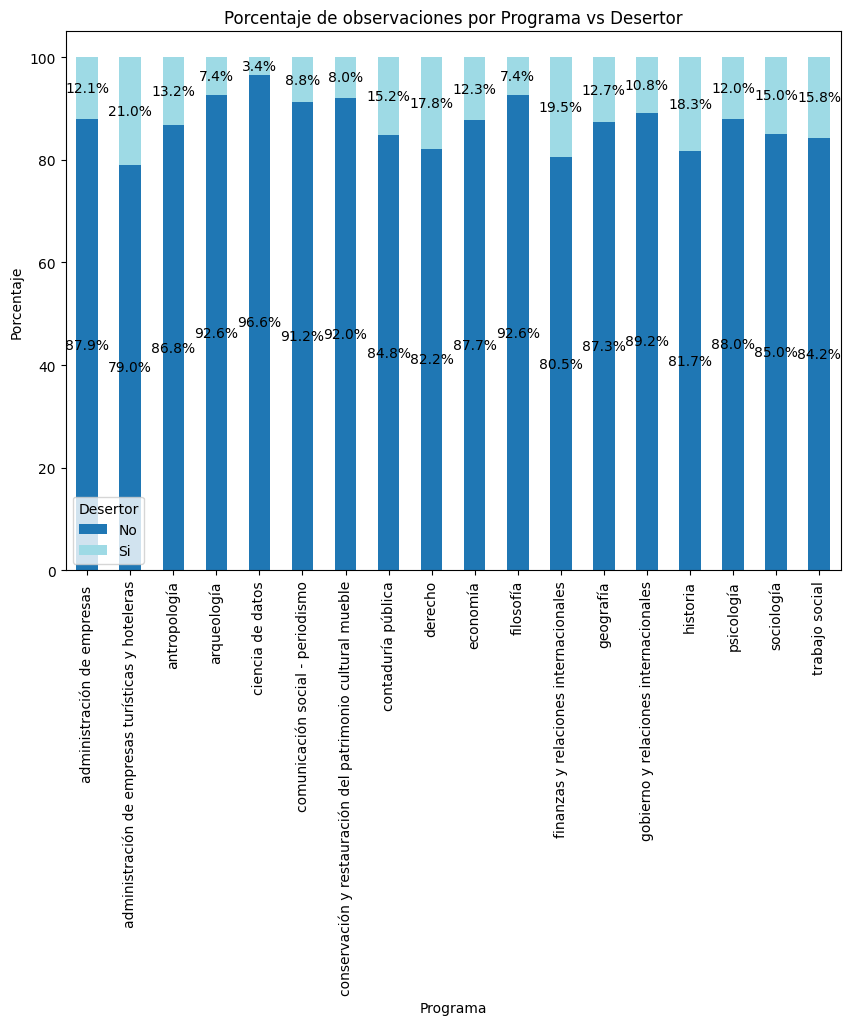

In [157]:
graf_barra_atributo_multivariable(df_datos, 'Programa', 'Desertor')

Al parecer existen programas con un mayor grado de deserción, siendo los tres que tienen una mayor cantidad de registros historicos: 

- administración de empresas turísticas y hoteleras con el 21%
- finanzas y relaciones internacionales con 19.5%
- historia con 18.3%

Además de una baja cantidad de deserción en programas como:

- ciencia de datos con 3.4%
- Filosofia y arqueología con 7.4%
- conservación y restauración del patrimonio cultural mueble con el 8%

Por lo tanto, el atributo del programa puede estar fuertemente relacionado con la deserción.

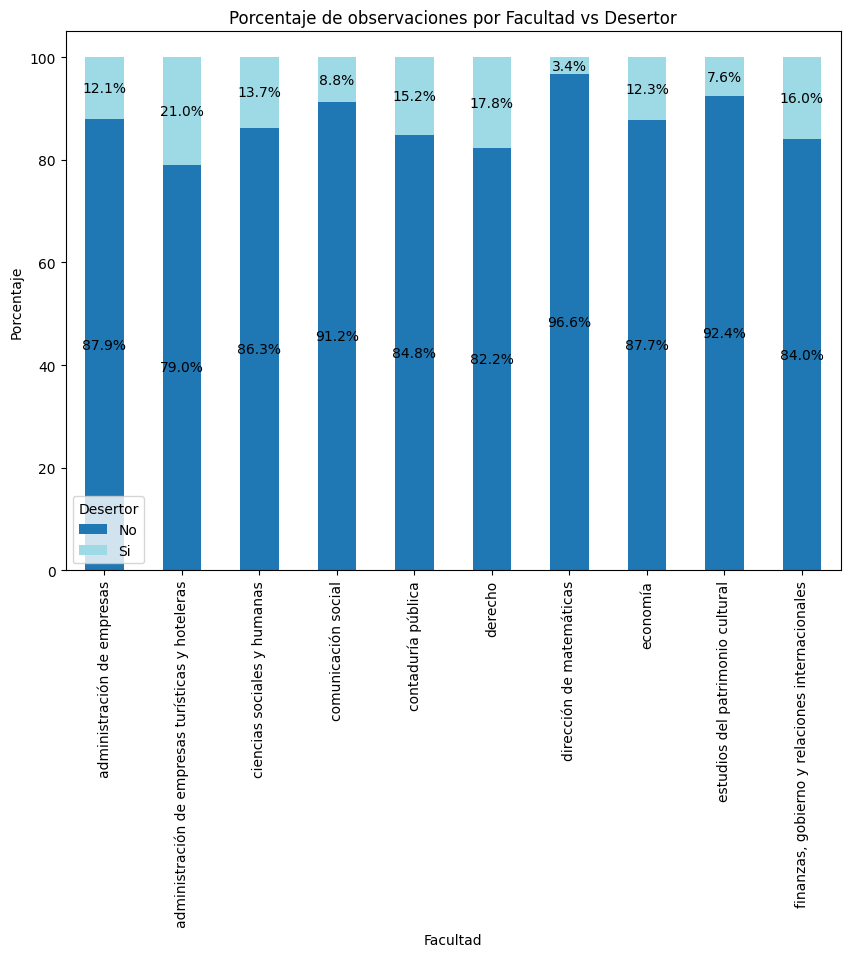

In [159]:
graf_barra_atributo_multivariable(df_datos, 'Facultad', 'Desertor')

Dado que los programas inflyen en los datos al revisarlos por facultad, vemos comprtamientos muy simialres y que se pueden relacionar a la deserción, siendo la facultad de "administración de empresas turísticas y hoteleras" la que más estudiantes desertados presenta y la de menor cantida es la de "dirección de matemáticas"

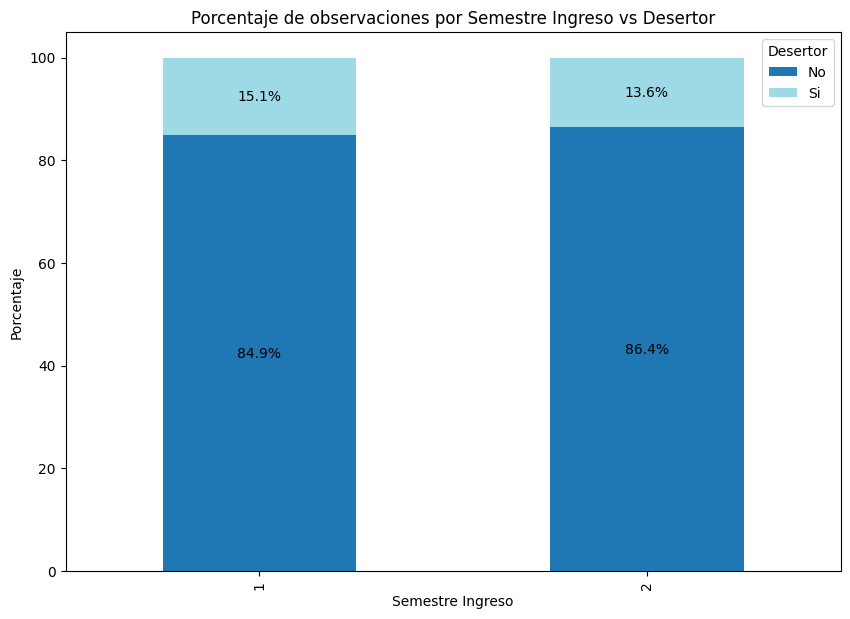

In [172]:
graf_barra_atributo_multivariable(df_datos, 'Semestre Ingreso', 'Desertor')

No parece existir una relacion entre el semestre en el que ingresa el estudiante y la deserción.

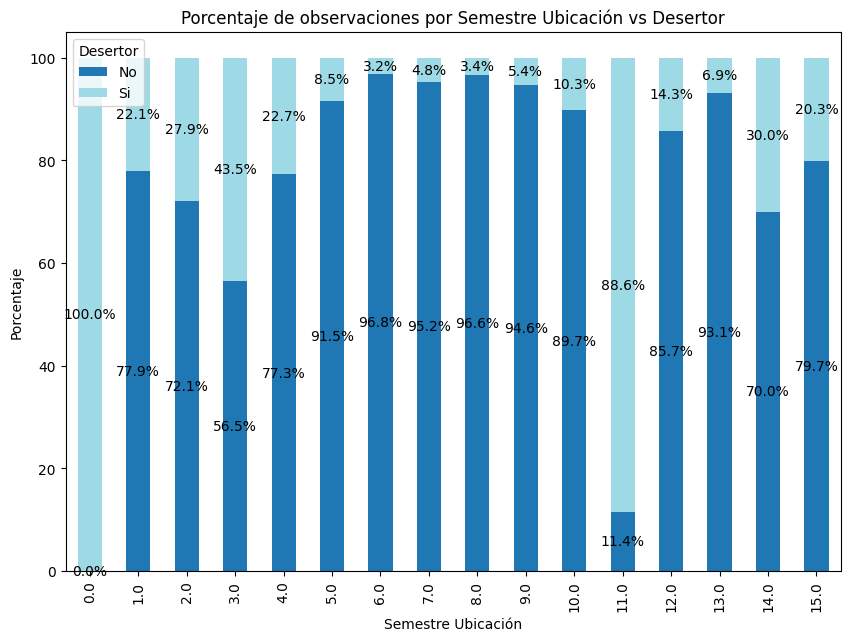

In [176]:
graf_barra_atributo_multivariable(df_datos, 'Semestre Ubicación', 'Desertor')

Parece ser que los semestres en los que más desiertan los estudiantes son los cuatro primeros (obviar el de semestre cero que es un registro) y el de mayor porcenatje de deserción tiene es el semestre 11.

In [163]:
# Función para la visualización de boxplots multivariable

def graf_box_plot_multivariable(df, atributo, atributo_comparar):
    ax = sns.boxplot(x=atributo_comparar, y=atributo, data = df)
    ax.tick_params(axis='x', labelrotation=45)
    plt.title(f'Boxplot de {atributo} por {atributo_comparar}')

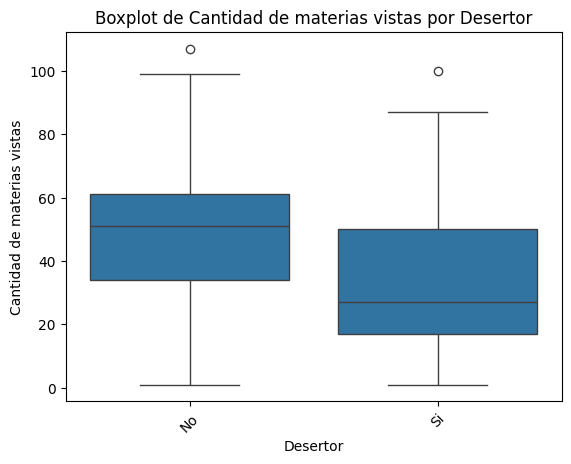

In [164]:
graf_box_plot_multivariable(df_datos, "Cantidad de materias vistas", "Desertor")

Segun el comportamiento observado en los box plot, los desertores ven menos materías que los que no desiertan, esto tiene logica dado que si te agraduas vas a ver una cantidad elevada de materias. Además se obeserva como los que desiertan en un 2% de los casos ven más de 50 materias, asi que a deserción no solo ocurren en los primeros semestres. 

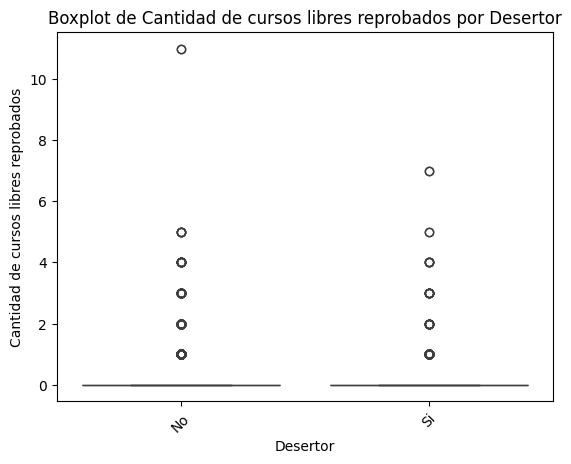

In [165]:
graf_box_plot_multivariable(df_datos, "Cantidad de cursos libres reprobados", "Desertor")

No hay un comportamiento muy claro al revisar la Cantidad de cursos libres reprobados según la deserción.

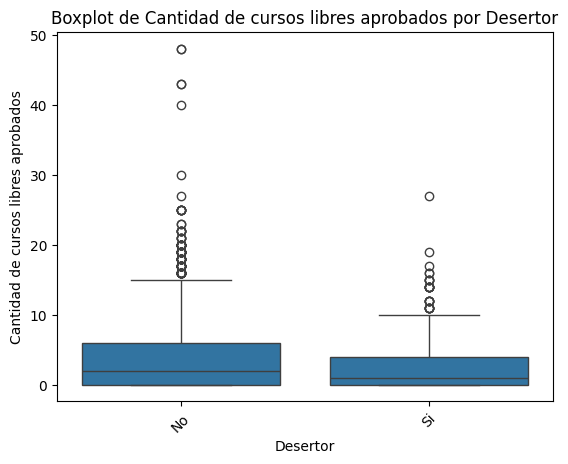

In [166]:
graf_box_plot_multivariable(df_datos, "Cantidad de cursos libres aprobados", "Desertor")

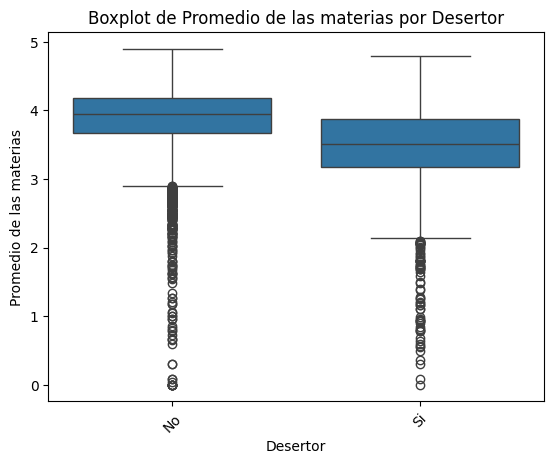

In [167]:
graf_box_plot_multivariable(df_datos, "Promedio de las materias", "Desertor")

Si bien el promedio de desertores es menor al de los que no desiertan, no se ve  un comportamiento tan drástico, por lo que se podría pensar que la mayoría de los desertores no lo hacen por que tengan malas notas, ya que menos del 25% presentan un promedio menor al 3.

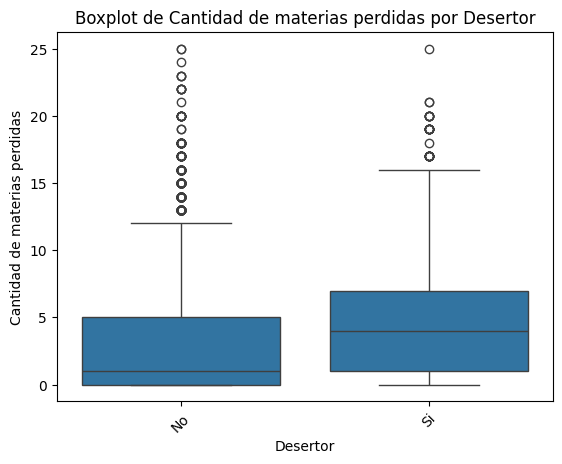

In [168]:
graf_box_plot_multivariable(df_datos, "Cantidad de materias perdidas", "Desertor")

Como era de esperarse los que desiertan pierden más materías que los que no desiertan, pero esto tambien puede deberse a las normas de la universidad.

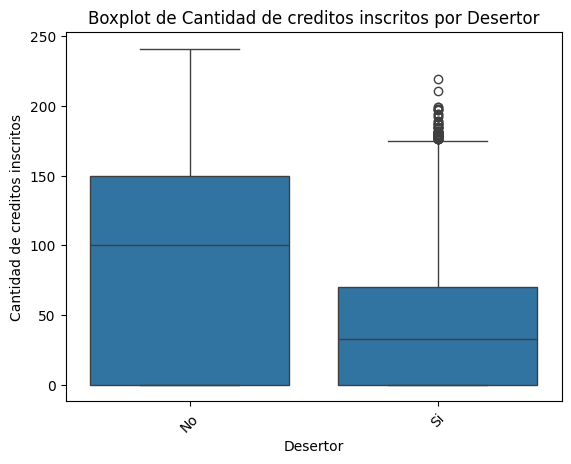

In [169]:
graf_box_plot_multivariable(df_datos, "Cantidad de creditos inscritos", "Desertor")

Las personas que desiertan inscriben menos creditos que los que no, en el 75% de los casos que desertarón lo hicieron antes de inscribir 80 creditos, de manera que un estudiante que supera esta barrera tiene menos probabilidad de que desierte.

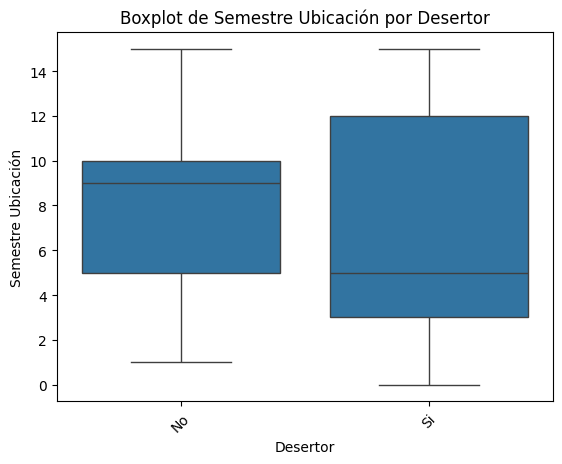

In [170]:
graf_box_plot_multivariable(df_datos, "Semestre Ubicación", "Desertor")

Hay un rango muy alto en los semestres en que los estudiantes desiertan, parece ser que el avanzar en los semestres cursados no disminuye la probabilidad de desertar, puede ocurrir en cualquier momento.

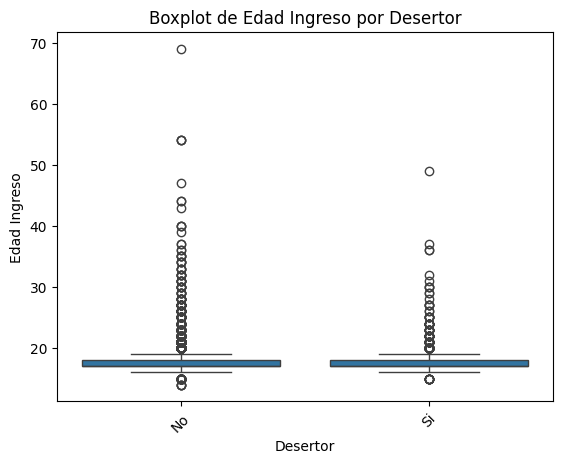

In [173]:
graf_box_plot_multivariable(df_datos, "Edad Ingreso", "Desertor")

No parece haber una relación entre la edad y la deserción.

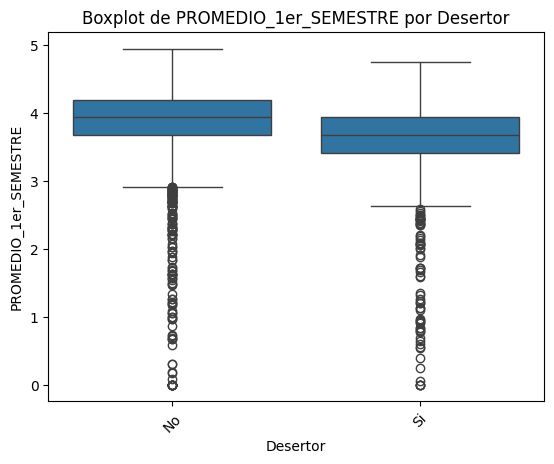

In [174]:
graf_box_plot_multivariable(df_datos, "PROMEDIO_1er_SEMESTRE", "Desertor")

Hay una diferencia entre el promedio en el primer semestre de las personas que desiertan vs las que no, debe validarse en el modelado.

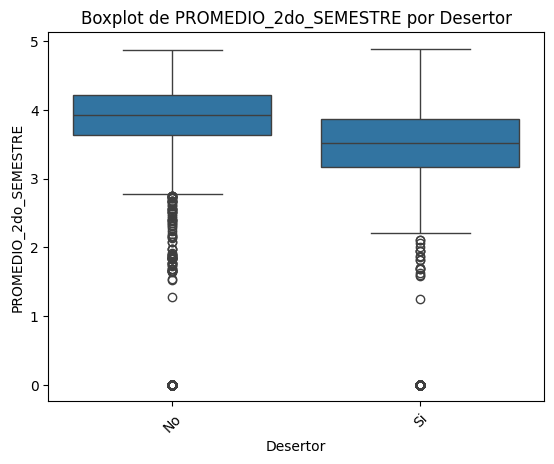

In [175]:
graf_box_plot_multivariable(df_datos, "PROMEDIO_2do_SEMESTRE", "Desertor")

Comportamiento muy similar al registrado con el promedio del primer semestre.

In [160]:
df_datos["Facultad"].value_counts()

Facultad
derecho                                              3704
ciencias sociales y humanas                          1936
finanzas, gobierno y relaciones internacionales      1860
comunicación social                                  1621
administración de empresas                           1122
administración de empresas turísticas y hoteleras     959
economía                                              798
contaduría pública                                    512
estudios del patrimonio cultural                      433
dirección de matemáticas                              147
Name: count, dtype: int64

In [155]:
df_datos.columns

Index(['ID_SNIES', 'Sexo', 'Estado Civil', 'Etnia', 'Discapacidad',
       'Departamento Nacimiento', 'Programa', 'Facultad', 'Tipo Plan',
       'Nombre Plan', 'PROMEDIO_1er_SEMESTRE', 'PROMEDIO_2do_SEMESTRE',
       'Desertor', 'Semestre Ingreso', 'Edad Ingreso',
       'Cantidad de materias vistas', 'Cantidad de cursos libres reprobados',
       'Cantidad de cursos libres aprobados', 'Promedio de las materias',
       'Cantidad de materias perdidas', 'Cantidad de creditos inscritos',
       'Semestre Ubicación'],
      dtype='object')

In [177]:
columnas_mantener = ['Sexo', 'Estado Civil', 'Discapacidad',
       'Departamento Nacimiento', 'Programa', 'Facultad', 'Tipo Plan',
       'PROMEDIO_1er_SEMESTRE', 'PROMEDIO_2do_SEMESTRE', 'Desertor', 
       'Cantidad de materias vistas', 'Promedio de las materias',
       'Cantidad de materias perdidas', 'Cantidad de creditos inscritos',
       'Semestre Ubicación']

In [178]:
datos_modelado = df_datos[columnas_mantener]
datos_modelado.to_csv("datos_modelado.csv", index=False, encoding='ISO-8859-1', sep=";")